In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
boston=pd.read_csv("C:\\Users\\Jayant\\Desktop\\datasets\\trainboston1.csv")

In [91]:

x,y=boston.drop('Y',axis=1),boston['Y']
boston.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Y
0,-0.407850,-0.487722,-1.266023,-0.272599,-0.576134,1.239974,0.840122,-0.520264,-0.752922,-1.278354,-0.303094,0.410571,-1.097990,37.9
1,-0.407374,-0.487722,0.247057,-0.272599,-1.016689,0.001946,-0.838337,0.336351,-0.523001,-0.060801,0.113032,0.291169,-0.520474,21.4
2,0.125179,-0.487722,1.015999,-0.272599,1.367490,-0.439699,0.687212,-0.577309,1.661245,1.530926,0.806576,-3.795795,0.891076,12.7
3,0.028304,-0.487722,1.015999,-0.272599,1.859875,-0.047918,0.801005,-0.712836,1.661245,1.530926,0.806576,-0.066050,0.215438,19.9
4,-0.412408,-0.487722,-0.969827,-0.272599,-0.913029,-0.384137,-0.834781,0.300508,-0.752922,-0.957633,0.020560,0.431074,0.029007,22.5


In [96]:
y=np.array(y)

In [144]:
from sklearn.decomposition import PCA

pca=PCA()
y=y.reshape(-1,1)
pca.fit(x)
xx=pca.transform(x)
yy=pca.transform(y)


reduced=pca.fit_transform(x)

#plt.scatter(reduced[:,0],y)
#pca.inverse_transform(reduced)
temp=pca.explained_variance_
tempratio=pca.explained_variance_ratio_
#pca.components_   gives unit vector along transformd axis in original dimension

array([[-1.66034655,  1.21767005,  0.09573734, ..., -0.13258101,
        -0.22464267, -0.0926216 ],
       [-1.06782879, -0.21759781, -0.58875636, ...,  0.52415502,
        -0.32929382,  0.20303577],
       [ 3.65843308, -1.21768542,  0.91491917, ..., -0.10723096,
         0.26860742, -0.05495246],
       ...,
       [-0.90883868, -0.18087672, -0.77329949, ...,  0.41946955,
        -0.495182  ,  0.20164733],
       [-2.10545006, -0.45383377, -0.10336004, ..., -0.03613523,
        -0.16091048,  0.83076013],
       [ 2.0179136 ,  2.23307276,  2.68018513, ...,  0.22888277,
        -0.29187348,  0.01390896]])

In [100]:
total=0;k=0;i=0
while total<0.95:
    total+=tempratio[i]
    i+=1
    k+=1
    
print("feature to attain >95-->",k)    

feature to attain >95--> 9


In [142]:
# from mpl_toolkits.mplot3d import Axes3D
# import itertools
from sklearn.ensemble import BaggingRegressor
alg1 = BaggingRegressor()
alg1.fit(reduced ,y)

# fig = plt.figure(figsize=(8,8))
# ax = Axes3D(fig)

# ax.scatter(reduced[:,0],reduced[:,1],y,color='b')


alg1.score(reduced,y)

C:\Users\Jayant\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9612523479761298

In [71]:
from random import *
mean_vc=np.array([0,0,0])
cov_variance=np.identity(3)
class1=np.random.multivariate_normal(mean_vc,cov_variance,100)


In [73]:
mean_vc=np.array([1,1,1])
cov_variance=np.identity(3)
class2=np.random.multivariate_normal(mean_vc,cov_variance,100)


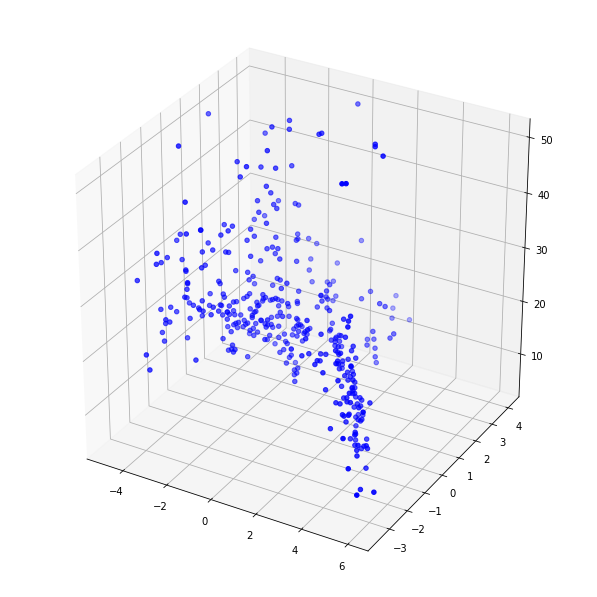

In [141]:
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure(figsize=(8,8))
ax = Axes3D(fig)

ax.scatter(reduced[:,0],reduced[:,1],y,color='b')


In [76]:

all_data=np.concatenate((class1,class2))
reduced


In [81]:
covar=np.cov(all_data.T)
eigvalue,eigvec= np.linalg.eig(covar)

eigvalue


array([1.6552936 , 0.89278964, 1.12868514])

In [82]:
pca.explained_variance_


array([6.22880745, 1.51710738, 1.25495319, 0.92703043, 0.87962626,
       0.68033668, 0.60959626, 0.38908825, 0.29425729])